1. wyświetlenie podstawowych informacji - df.info()
2. sprawdzenie nulli - df.isnull().sum()
3. co zrobić z nullami - uzupełnić czy wyrzucić
4. sparwdzenie wartości min/max/std itd. - df.describe()
5. histogram
6. boxplot - żeby sprawdzić wartości odstające
7. dla zmiennych kategorycznych sprawdzenie wartości- value_counts()
8. co zrobić ze zmiennymi kategorycznymi? - onehotencoding vs labelencoding vs inne czy zostawić małoliczne kategorie, czy np zrobić jedną "OTHER" do której one będą należeć
9. sprawdzenie wartości odstających dla zmiennych ciągłych - boxplot, percentyle, reguła 3 sigm (dla danych które mają rozkład normalny) co z nimi zrobić - usunąć czy uzupełnić
10. standaryzacja / normalizacja
11. dyskredytacja
12. model
13. pipeline

dodatkowo:
1. optymalizacja hiperparametrów: randomsearch, gridsearch, hyperopt, optuna (do wyboru)
2. xai


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from numpy.random import RandomState
import sklearn.metrics
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
import plotly.graph_objects as go
import pycountry

In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import of datasets

In [ ]:
df = pd.read_csv("/content/train.csv", index_col = 0)
df.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
649,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,Canada,no,14.301846,18 and more,Self,1
82,0,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,yes,no,Saudi Arabia,no,0.245984,18 and more,Self,0
458,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,Ireland,yes,13.820537,18 and more,Self,0
74,0,0,0,0,0,0,0,1,1,0,...,m,Asian,no,no,India,no,6.850231,18 and more,Self,0
166,1,0,1,1,1,1,1,0,0,1,...,m,Turkish,no,yes,Sri Lanka,no,13.472767,18 and more,Self,0
225,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,New Zealand,no,8.430914,18 and more,Self,0
197,0,1,0,0,0,0,0,1,0,0,...,m,?,no,no,India,no,4.671102,18 and more,Self,0
623,1,0,0,0,0,0,0,0,0,1,...,m,White-European,no,no,India,no,11.429835,18 and more,Self,0
581,0,0,0,0,0,0,0,0,0,0,...,m,?,no,no,New Zealand,no,10.810172,18 and more,Self,0


In [ ]:
df_test = pd.read_csv("/content/test.csv", index_col = 0)
df_test.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
ID,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
97,1,1,1,1,1,1,1,1,1,1,56.166652,m,White-European,no,yes,Canada,no,10.096347,18 and more,Self
145,0,0,0,0,0,0,0,0,0,1,25.390679,f,Asian,no,no,United Arab Emirates,no,9.127151,18 and more,?
163,1,1,1,0,0,1,0,0,1,1,59.146102,f,White-European,yes,no,India,no,6.865573,18 and more,Self
7,1,1,1,1,0,1,1,1,1,1,11.753213,m,?,yes,no,United States,no,11.325547,18 and more,Self
81,1,1,1,1,1,1,1,1,1,1,21.556535,m,Turkish,no,yes,United States,no,14.192993,18 and more,Self
61,1,0,1,1,1,0,1,1,1,1,16.110651,m,?,no,no,United States,no,4.414692,18 and more,Self
36,1,1,0,1,1,1,1,1,1,1,22.174896,m,White-European,yes,no,Iran,no,11.261905,18 and more,Self
54,1,0,1,1,1,1,1,1,1,1,29.162880,f,White-European,no,no,United States,no,11.293446,18 and more,Self


### Checking type of values and is we have some null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

### Checking values in age_desc

In [ ]:
df.groupby(['age_desc'])['age_desc'].count()

age_desc
18 and more    800
Name: age_desc, dtype: int64

In [ ]:
#We have only one value in age_desc sa we decide to ignore it.

### Convert text to numeric values

In [ ]:
df = df.replace('?',np.nan)
df = df.replace('no',0)
df = df.replace('yes',1)
df_test = df_test.replace('?',np.nan)
df_test = df_test.replace('no',0)
df_test = df_test.replace('yes',1)


### Checking values in gender

In [ ]:
df.groupby(['gender'])['gender'].count()

gender
f    270
m    530
Name: gender, dtype: int64

In [ ]:
df = df.replace('m',0)
df = df.replace('f',1)
df_test = df_test.replace('m',0)
df_test = df_test.replace('f',1)

In [ ]:
df[df['age']<16][['age','relation']]

,age,relation
ID,,
3,7.380373,Self
12,9.044226,Relative
19,14.404985,Self
22,15.367501,Self
25,14.129108,Self
...,...,...
790,10.784318,Self
791,14.711298,Self
793,5.469183,Self


In [ ]:
df.groupby(['relation'])['relation'].count()

relation
Health care professional      2
Others                        2
Parent                       29
Relative                     18
Self                        709
Name: relation, dtype: int64

In [ ]:
df['relation'] = df['relation'].replace(np.nan,'Others')
df_test['relation'] = df_test['relation'].replace(np.nan,'Others')

In [ ]:
df.groupby(['contry_of_res'])['contry_of_res'].count()

contry_of_res
Afghanistan              22
AmericanSamoa             4
Angola                    1
Argentina                 1
Armenia                   4
Aruba                     4
Australia                37
Austria                  18
Azerbaijan                4
Bahamas                   6
Bangladesh                1
Belgium                   1
Bolivia                   3
Brazil                   12
Burundi                   1
Canada                   30
China                     4
Cyprus                    2
Czech Republic            1
Egypt                     1
Ethiopia                  3
France                   10
Germany                   3
Hong Kong                 1
Iceland                   3
India                   108
Iran                      8
Iraq                      4
Ireland                   9
Italy                     6
Japan                     1
Jordan                   55
Kazakhstan               10
Malaysia                  6
Mexico                    4
Nether

In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,...,1,NaN,0,0,Austria,0,6.351166,18 and more,Self,0
2,0,0,0,0,0,0,0,0,0,0,...,0,NaN,0,0,India,0,2.255185,18 and more,Self,0
3,1,1,1,1,1,1,1,1,1,1,...,0,White-European,0,1,United States,0,14.851484,18 and more,Self,1
4,0,0,0,0,0,0,0,0,0,0,...,1,NaN,0,0,United States,0,2.276617,18 and more,Self,0
5,0,0,0,0,0,0,0,0,0,0,...,0,NaN,0,0,South Africa,0,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,1,1,...,0,Hispanic,0,0,New Zealand,0,12.999501,18 and more,Self,0
797,0,1,1,0,0,1,0,1,1,1,...,0,White-European,0,0,Cyprus,0,13.561518,18 and more,Self,0
798,0,0,0,0,0,0,0,0,0,0,...,0,South Asian,1,0,New Zealand,0,2.653177,18 and more,Self,0


In [ ]:
df.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation             0
Class/ASD            0
dtype: int64

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,used_app_before,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,0.337500,0.231250,0.16375,0.062500,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,0.473153,0.421896,0.37028,0.242213,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,0.000000,0.000000,0.00000,0.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,0.000000,0.000000,0.00000,0.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,0.000000,0.000000,0.00000,0.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,1.000000,0.000000,0.00000,0.000000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,1.000000,1.000000,1.00000,1.000000,15.853126,1.000000


In [ ]:
df.groupby(['A1_Score'])['A1_Score'].count()

A1_Score
0    352
1    448
Name: A1_Score, dtype: int64

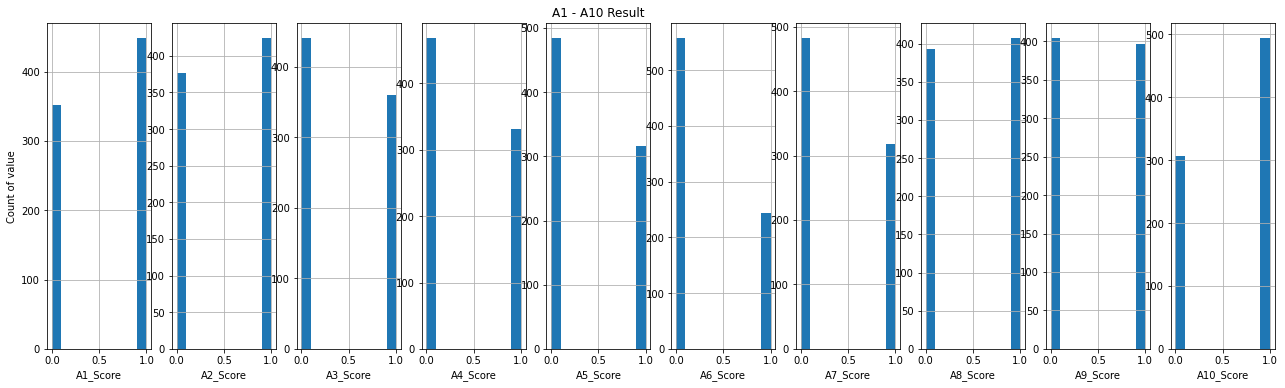

In [ ]:
fig, ax=plt.subplots(figsize=(22,6))


plt.subplot(1, 10, 1)
df['A1_Score'].hist()
plt.xlabel('A1_Score')
plt.ylabel('Count of value')

plt.subplot(1, 10, 2)
df['A2_Score'].hist()
plt.xlabel('A2_Score')

plt.subplot(1, 10, 3)
df['A3_Score'].hist()
plt.xlabel('A3_Score')

plt.subplot(1, 10, 4)
df['A4_Score'].hist()
plt.xlabel('A4_Score')

plt.subplot(1, 10, 5)
df['A5_Score'].hist()
plt.xlabel('A5_Score')
plt.title('A1 - A10 Result')

plt.subplot(1, 10, 6)
df['A6_Score'].hist()
plt.xlabel('A6_Score')

plt.subplot(1, 10, 7)
df['A7_Score'].hist()
plt.xlabel('A7_Score')

plt.subplot(1, 10, 8)
df['A8_Score'].hist()
plt.xlabel('A8_Score')

plt.subplot(1, 10, 9)
df['A9_Score'].hist()
plt.xlabel('A9_Score')

plt.subplot(1, 10, 10)
df['A10_Score'].hist()
plt.xlabel('A10_Score')

plt.show()


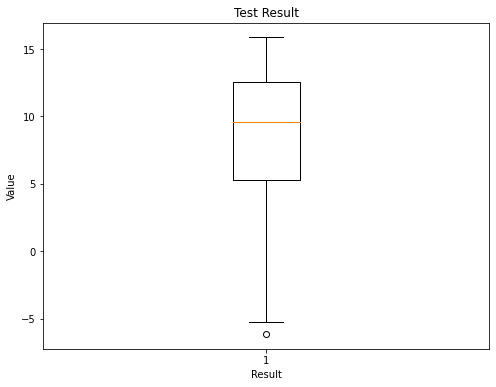

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
ax.boxplot(df['result'].dropna())
ax.set_xlabel('Result')
ax.set_ylabel('Value')
plt.title('Test Result')
plt.show()

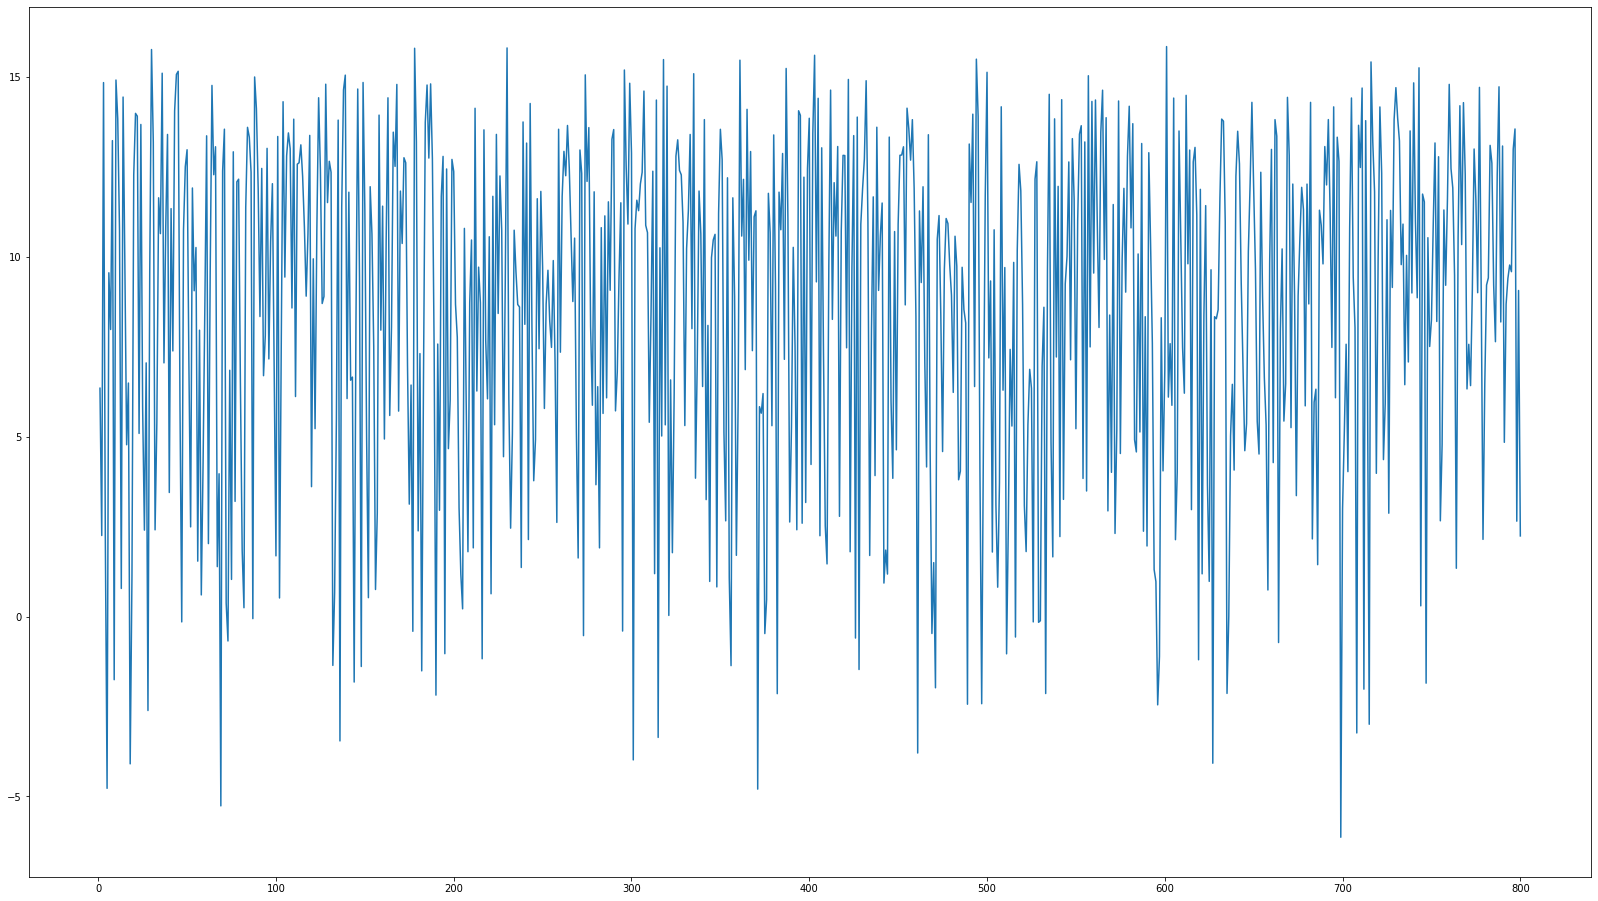

In [ ]:
fig, ax= plt.subplots(figsize=(28,16)) 

ax.plot(df.index, df['result'])

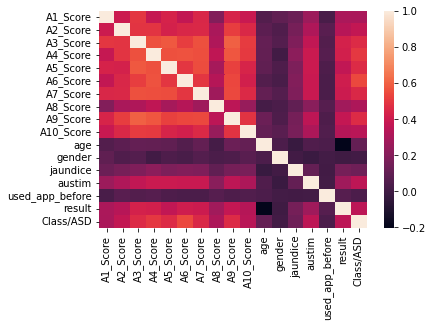

In [ ]:
sns.heatmap(df.corr())

In [ ]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in df['contry_of_res']]

fig = go.Figure(data=go.Choropleth(
    locations = codes,
    z = df['result'],
    text = df['contry_of_res'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Value of result',
))
# fig.update_layout(
#     title_text= 'Global Result',
#     geo=dict(
#         showframe=False,
#         showcoastlines=False,
#         projection_type='equirectangular'
#     ),
#     annotations = [dict(
#         x=0.55,
#         y=0.1,
#         xref='paper',
#         yref='paper',
#         showarrow = False
#     )]
# )


fig.show()

In [ ]:
df[df['result']<6][['result', 'A1_Score', 'A2_Score', 'A3_Score','age', 'Class/ASD']]

,result,A1_Score,A2_Score,A3_Score,age,Class/ASD
ID,,,,,,
2,2.255185,0,0,0,47.750517,0
4,2.276617,0,0,0,23.561927,0
5,-4.777286,0,0,0,43.205790,0
9,-1.755774,1,1,1,48.203459,0
13,0.781777,0,0,1,56.008168,0
...,...,...,...,...,...,...
764,1.343302,0,1,0,13.670266,0
779,2.147215,0,0,1,47.220941,0
791,4.846236,1,0,1,14.711298,0


In [ ]:
X = df.copy()
X.drop(columns = ['age_desc','ethnicity', 'Class/ASD'], inplace = True) 

In [ ]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,contry_of_res,used_app_before,result,relation
ID,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,38.172746,1,0,0,Austria,0,6.351166,Self
2,0,0,0,0,0,0,0,0,0,0,47.750517,0,0,0,India,0,2.255185,Self
3,1,1,1,1,1,1,1,1,1,1,7.380373,0,0,1,United States,0,14.851484,Self
4,0,0,0,0,0,0,0,0,0,0,23.561927,1,0,0,United States,0,2.276617,Self
5,0,0,0,0,0,0,0,0,0,0,43.205790,0,0,0,South Africa,0,-4.777286,Self
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,1,1,16.597187,0,0,0,New Zealand,0,12.999501,Self
797,0,1,1,0,0,1,0,1,1,1,20.703001,0,0,0,Cyprus,0,13.561518,Self
798,0,0,0,0,0,0,0,0,0,0,5.711481,0,1,0,New Zealand,0,2.653177,Self


In [ ]:
y = df['Class/ASD']

In [ ]:
y

ID
1      0
2      0
3      1
4      0
5      0
      ..
796    0
797    0
798    0
799    0
800    0
Name: Class/ASD, Length: 800, dtype: int64

In [ ]:
cols_binary_numerical = X.columns.drop(['contry_of_res', 'relation','age','result'])

In [ ]:
cols_binary_numerical

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice',
       'austim', 'used_app_before'],
      dtype='object')

In [ ]:
cols_numerical = ['age','result']

In [ ]:
cols_numerical

['age', 'result']

In [ ]:
cols_categorical = ['contry_of_res', 'relation']

In [ ]:
cols_categorical

['contry_of_res', 'relation']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size =0.2, random_state =555 , stratify= y)  

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state=555, stratify=y_temp)

In [ ]:
y.sum()/y.count()

0.20125

In [ ]:
y_train.sum()/y_train.count()

0.20208333333333334

In [ ]:
y_val.sum()/y_val.count()

0.2

In [ ]:
y_test.sum()/y_test.count()

0.2

In [ ]:
def count_boundary(col):
  
  q1 = col.quantile(0.25)
  
  q3 = col.quantile(0.75)
  
  iqr = q3 - q1
  
  low_boundary = q1 - 1.5 * iqr
  upper_boundary = q3 + 1.5 * iqr

  return low_boundary, upper_boundary

In [ ]:
lb, ub = count_boundary(X_train['result'])

In [ ]:
class DetectOutliersTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    #'age', 'result'
    self.agelb, self.ageub = count_boundary(X['age'])
    self.agemean = X['age'].mean()

    self.resultlb, self.resultub = count_boundary(X['result'])
    self.resultmean = X['result'].mean()

    return self

  def transform(self, X):

    X[(X['age']> self.ageub) | (X['age']< self.agelb)]['age']= self.agemean
    
    X[(X['result']> self.resultub) | (X['result']< self.resultlb)]['result'] = self.resultmean

    return X

In [ ]:
transformer_numerical = Pipeline(steps = [            #transformer for numerical data
    ('outlier', DetectOutliersTransformer()),         #we want to detetect outelier with our own Transformer
    ('imputer', SimpleImputer(strategy = 'mean')),    #we want to imput data
    ('discretizer', None),                            #we want to discretize data
    ('scaler', StandardScaler())                      #we want to scale our data
])  

In [ ]:
transformer_binary_numerical = Pipeline(steps = [            #transformer for numerical data
    ('imputer', SimpleImputer(strategy = 'most_frequent'))    #we want to imput data
])  

In [ ]:
transformer_categorical = Pipeline(steps = [            #transformer for categorical data
    ('imputer', SimpleImputer(strategy = 'most_frequent'))    #we want to imput categorical data
    ,('onehotenc', OneHotEncoder())
])  

In [ ]:
preprocessor = ColumnTransformer(transformers =[              #preprocessor - if we want to have eg. transformer for binary data, we should create binary_transformer and add it here
    ('numerical', transformer_numerical, cols_numerical),
    ('binary_numerical', transformer_binary_numerical, cols_binary_numerical),
    ('categorical', transformer_categorical, cols_categorical),
])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe = Pipeline( steps = [                                #simple Piple with preprocessor and model
    ('preprocessor', preprocessor),
    ('model',  LogisticRegression(random_state=0))
])

In [ ]:
pipe.fit(X_train, y_train)

<ipython-input-366-b94ca16fc439>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   DetectOutliersTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('discretizer',
                                                                   None),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'result']),
                                                 ('binary_numerical',
                                                  Pipeline(steps=[('imputer',
                           

In [ ]:
y_pred_train = pipe.predict(X_train)

<ipython-input-366-b94ca16fc439>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sklearn.metrics.accuracy_score(y_train, y_pred_train)

0.8895833333333333

In [ ]:
recall_score(y_train, y_pred_train)

0.7216494845360825

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[357,  26],
       [ 27,  70]])

In [ ]:
precision_score(y_train, y_pred_train)

0.7291666666666666

In [ ]:
f1_score(y_train, y_pred_train)

0.7253886010362695

In [ ]:
roc_auc_score(y_train, y_pred_train)

0.8268821835213049